# Customer Churn Prediction Project
This project aims to predict customer churn using a **Decision Tree** model. We will perform **10-fold Cross Validation** to evaluate the model's performance. This is a complete Data Science project ready to be included in a professional portfolio.

## Step 1: Importing Libraries and Loading the Data

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data from Google Drive or local path
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Python_DataScience/customer-churn-data.xlsx'

# Load the data into a pandas DataFrame
import pandas as pd
data = pd.read_excel(file_path)

# show header
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Age,Payment Method,Churn,LastTransaction
0,male,64,credit card,loyal,98
1,male,35,cheque,churn,118
2,female,25,credit card,loyal,107
3,female,39,credit card,NaN,177
4,male,39,credit card,loyal,90


## Step 2: Data Cleaning and Preprocessing
We need to handle missing values and convert categorical columns to numerical ones.

In [2]:
# Verify that the data is clean
data.isnull().sum(), data.head()

(Gender              0
 Age                 0
 Payment Method      0
 Churn              96
 LastTransaction     0
 dtype: int64,
    Gender  Age Payment Method  Churn  LastTransaction
 0    male   64    credit card  loyal               98
 1    male   35         cheque  churn              118
 2  female   25    credit card  loyal              107
 3  female   39    credit card    NaN              177
 4    male   39    credit card  loyal               90)

In [3]:
# Delete null value on Churn
data = data.dropna(subset=['Churn'])
data.isnull().sum(), data.head()

(Gender             0
 Age                0
 Payment Method     0
 Churn              0
 LastTransaction    0
 dtype: int64,
    Gender  Age Payment Method  Churn  LastTransaction
 0    male   64    credit card  loyal               98
 1    male   35         cheque  churn              118
 2  female   25    credit card  loyal              107
 4    male   39    credit card  loyal               90
 5  female   28         cheque  churn              189)

In [4]:
# check how many row now
data.shape

(900, 5)

In [5]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Payment Method'] = label_encoder.fit_transform(data['Payment Method'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

#show data header
data.head()

,Gender,Age,Payment Method,Churn,LastTransaction
0,1,64,2,1,98
1,1,35,1,0,118
2,0,25,2,1,107
4,1,39,2,1,90
5,0,28,1,0,189


## Step 3: Feature Selection
We will use the following columns as features for our model:
- Gender
- Age
- Payment Method
- LastTransaction
The target column is `Churn`, which indicates whether a customer churned or not.

In [6]:
# Separate features (X) and target (y)
X = data[['Gender', 'Age', 'Payment Method', 'LastTransaction']]
y = data['Churn']

# Display the shape of the feature matrix and target vector
X.shape, y.shape

((900, 4), (900,))

## Step 4: Building the Decision Tree Model
We will build a **Decision Tree Classifier** and use **10-fold Cross Validation** to evaluate the model.

In [16]:
# Create the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Perform 10-fold Cross Validation and compute the accuracy for each fold
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

# Display the accuracy scores and the mean accuracy
print('Accuracy scores for each fold:', scores)
print('Mean accuracy:', scores.mean())

Accuracy scores for each fold: [0.83333333 0.82222222 0.84444444 0.85555556 0.88888889 0.86666667
 0.83333333 0.9        0.82222222 0.8       ]
Mean accuracy: 0.8466666666666667


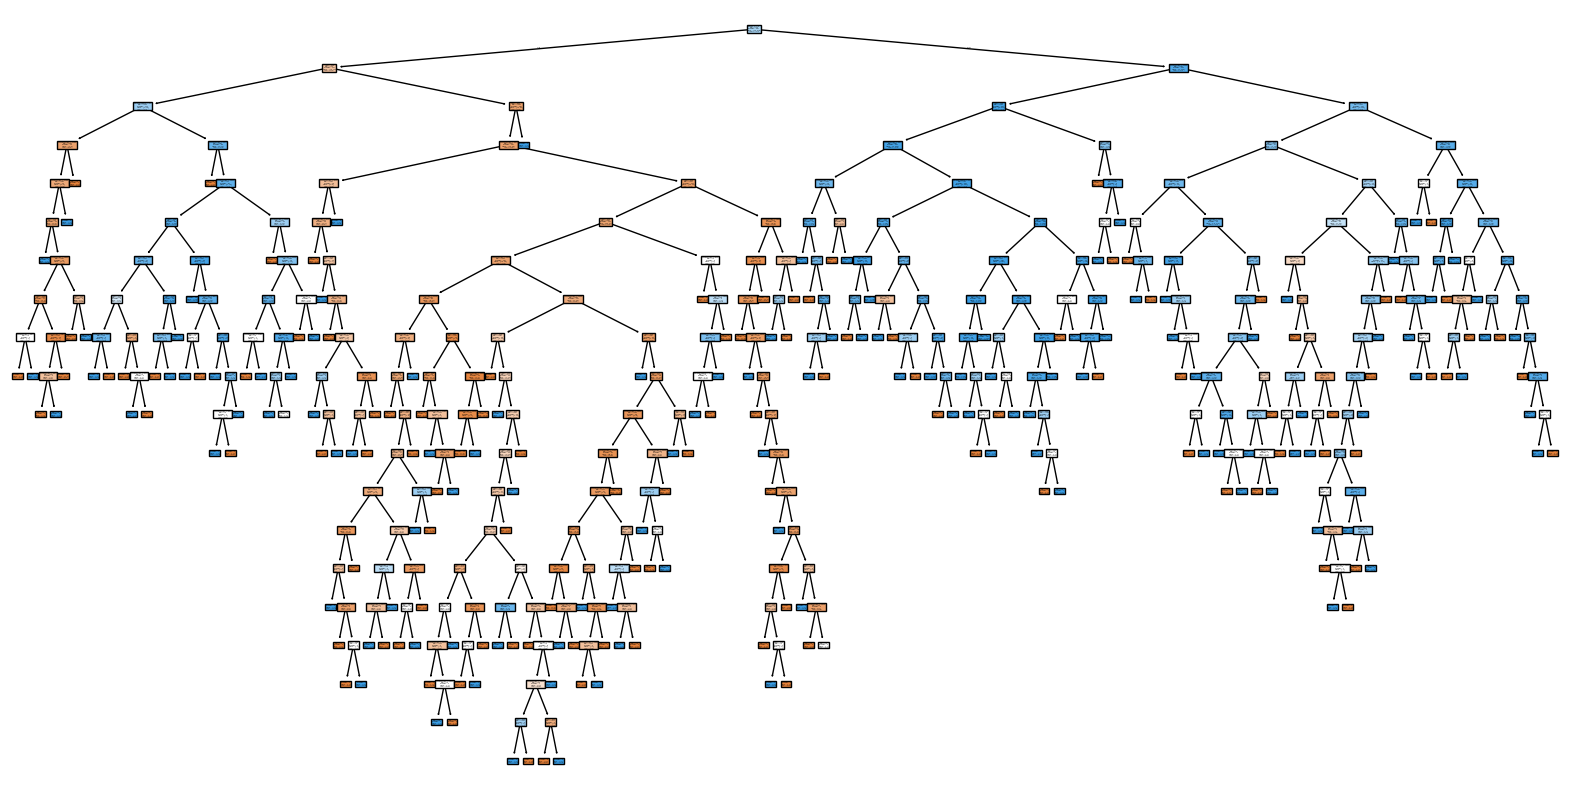

In [23]:
# Show the plot_tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Set the figsize
plt.figure(figsize=(20,10))

# Show Decision Tree
plot_tree(clf, filled=True, feature_names=['Gender', 'Age', 'Payment Method', 'LastTransaction'], class_names=['Loyal', 'Churn'])
plt.show()








## Step 5: Conclusion
The model achieved an average accuracy across 10 folds, showing that the Decision Tree performs reasonably well for predicting customer churn. Further improvements could include trying different algorithms like Random Forest or Gradient Boosting.

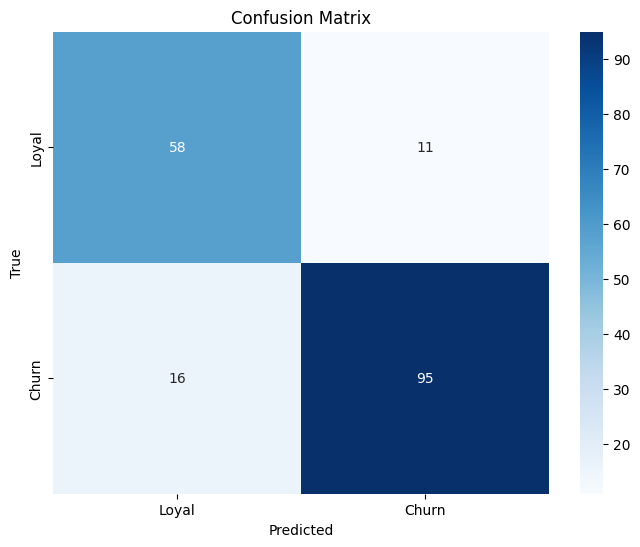

              precision    recall  f1-score   support

       Loyal       0.78      0.84      0.81        69
       Churn       0.90      0.86      0.88       111

    accuracy                           0.85       180
   macro avg       0.84      0.85      0.84       180
weighted avg       0.85      0.85      0.85       180



In [17]:
#train_test_split for Confusion Matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree on Training set
clf.fit(X_train, y_train)

# Set the y_pred for testing
y_pred = clf.predict(X_test)

# Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Show Confusion Matrix with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# show (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred, target_names=['Loyal', 'Churn']))

**Show the Confusion Matrix for all row **

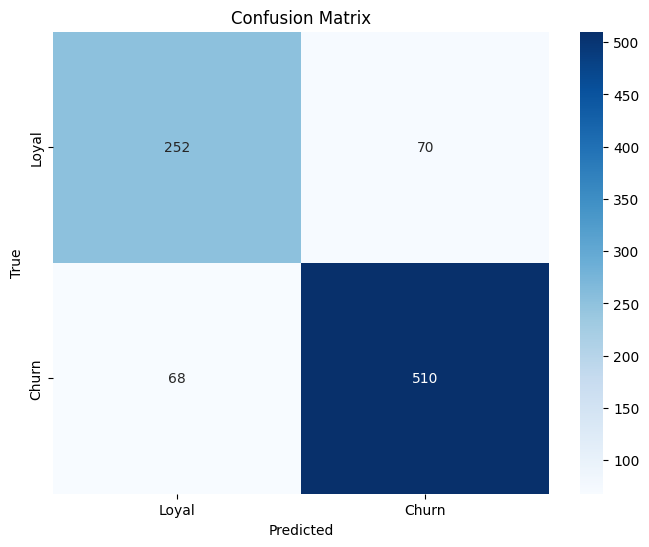

              precision    recall  f1-score   support

       Loyal       0.79      0.78      0.79       322
       Churn       0.88      0.88      0.88       578

    accuracy                           0.85       900
   macro avg       0.83      0.83      0.83       900
weighted avg       0.85      0.85      0.85       900



In [22]:
# Import the Cross Validation for cross_val_predict
from sklearn.model_selection import cross_val_predict

# Create Decision Tree
clf = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)

# Set prediction as y_pred for Cross Validation (10-fold)
y_pred = cross_val_predict(clf, X, y, cv=10)

# create Confusion Matrix
cm = confusion_matrix(y, y_pred)

# show Confusion Matrix with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Show (Precision, Recall, F1-score)
print(classification_report(y, y_pred, target_names=['Loyal', 'Churn']))